In [379]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [494]:
# Loading data
data=pd.read_csv("https://homepage.boku.ac.at/leisch/MSA/datasets/mcdonalds.csv")
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,+2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,+1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,+2,49,Once a month,Male


In [382]:
data.shape

(1453, 15)

In [383]:
#observe that Age is the only numeric column
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1453 entries, 0 to 1452
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   yummy           1453 non-null   object
 1   convenient      1453 non-null   object
 2   spicy           1453 non-null   object
 3   fattening       1453 non-null   object
 4   greasy          1453 non-null   object
 5   fast            1453 non-null   object
 6   cheap           1453 non-null   object
 7   tasty           1453 non-null   object
 8   expensive       1453 non-null   object
 9   healthy         1453 non-null   object
 10  disgusting      1453 non-null   object
 11  Like            1453 non-null   object
 12  Age             1453 non-null   int64 
 13  VisitFrequency  1453 non-null   object
 14  Gender          1453 non-null   object
dtypes: int64(1), object(14)
memory usage: 170.4+ KB


{'whiskers': [<matplotlib.lines.Line2D at 0x1c9896146a0>,
 'caps': [<matplotlib.lines.Line2D at 0x1c9896149d0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1c9896145e0>],
 'medians': [<matplotlib.lines.Line2D at 0x1c98847c4c0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1c98847c190>],
 'means': []}

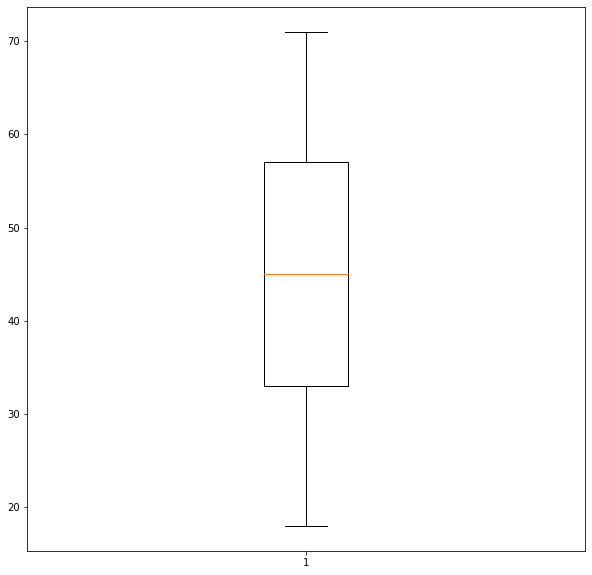

In [384]:
# Its verified that 'Age' column has no outliers

plt.boxplot(data['Age'])

In [385]:
# It is verified that the data has no missing values
data.isnull().sum()

yummy             0
convenient        0
spicy             0
fattening         0
greasy            0
fast              0
cheap             0
tasty             0
expensive         0
healthy           0
disgusting        0
Like              0
Age               0
VisitFrequency    0
Gender            0
dtype: int64

In [386]:
# Determining unique values of each columns
for col in data.columns:
    print('{} : {}'.format(col,data[col].unique()))

yummy : ['No' 'Yes']
convenient : ['Yes' 'No']
spicy : ['No' 'Yes']
fattening : ['Yes' 'No']
greasy : ['No' 'Yes']
fast : ['Yes' 'No']
cheap : ['Yes' 'No']
tasty : ['No' 'Yes']
expensive : ['Yes' 'No']
healthy : ['No' 'Yes']
disgusting : ['No' 'Yes']
Like : ['-3' '+2' '+1' '+4' 'I love it!+5' 'I hate it!-5' '-2' '+3' '0' '-4' '-1']
Age : [61 51 62 69 49 55 56 23 58 32 53 28 65 54 67 34 31 47 37 41 36 50 39 35
 20 24 44 40 48 38 57 60 66 42 26 52 29 25 22 45 18 68 43 21 27 33 63 46
 59 19 64 70 30 71]
VisitFrequency : ['Every three months' 'Once a week' 'Once a month' 'Once a year'
 'More than once a week' 'Never']
Gender : ['Female' 'Male']


In [495]:
# Observe that the following rows have contradictary information. The value is 'Yes' for both 'yummy' and 'disgusting'.
# Not yummy need not mean that the food is disgusting, so we exclude the No-No combination from contradictions.

contra1=data[(data['yummy']=='Yes') & (data['disgusting']=='Yes')]
contra1

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
11,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,+3,28,Once a month,Male
19,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,I love it!+5,37,More than once a week,Male
20,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,+2,41,Once a year,Female
22,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,-2,23,Once a week,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1311,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,+4,20,Once a week,Male
1344,Yes,Yes,No,Yes,No,Yes,Yes,No,Yes,No,Yes,-3,55,Once a year,Female
1381,Yes,Yes,No,Yes,Yes,Yes,No,No,Yes,No,Yes,+3,26,Once a week,Female
1434,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,41,Once a week,Male


In [496]:
# Observe that the following rows have contradictary information. The value is 'Yes' for both 'tasty' and 'disgusting'
# Not tasty need not mean that the food is disgusting, so we exclude the No-No combination from contradictions.

contra2=data[(data['tasty']=='Yes') & (data['disgusting']=='Yes')]
contra2

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,69,Once a week,Female
11,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,+3,28,Once a month,Male
19,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,I love it!+5,37,More than once a week,Male
20,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,+2,41,Once a year,Female
22,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,No,Yes,-2,23,Once a week,Female
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1364,No,Yes,No,Yes,No,Yes,Yes,Yes,No,No,Yes,+1,46,Every three months,Male
1415,No,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,-3,57,Every three months,Male
1434,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,+4,41,Once a week,Male
1439,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,+1,61,Once a month,Male


In [497]:
# Removing rows containing the above mentioned contradictory information

union_df=pd.concat([contra1,contra2],ignore_index=False)
union_df=union_df.drop_duplicates()
indices_to_drop = union_df.index.tolist()
data=data.drop(indices_to_drop)

In [431]:
# Shape of the cleaned data
data.shape

(1350, 15)

In [498]:
# Creating a copy of the dataframe and creating bins for the 'Age' column

datacopy=data.copy()
datacopy['Agebin'] = pd.cut(datacopy['Age'], bins = [15,25, 35, 50, 60, 70, 75], labels = ['15-25','26-35', '36-50', '51-60', '61-70','71-75'])

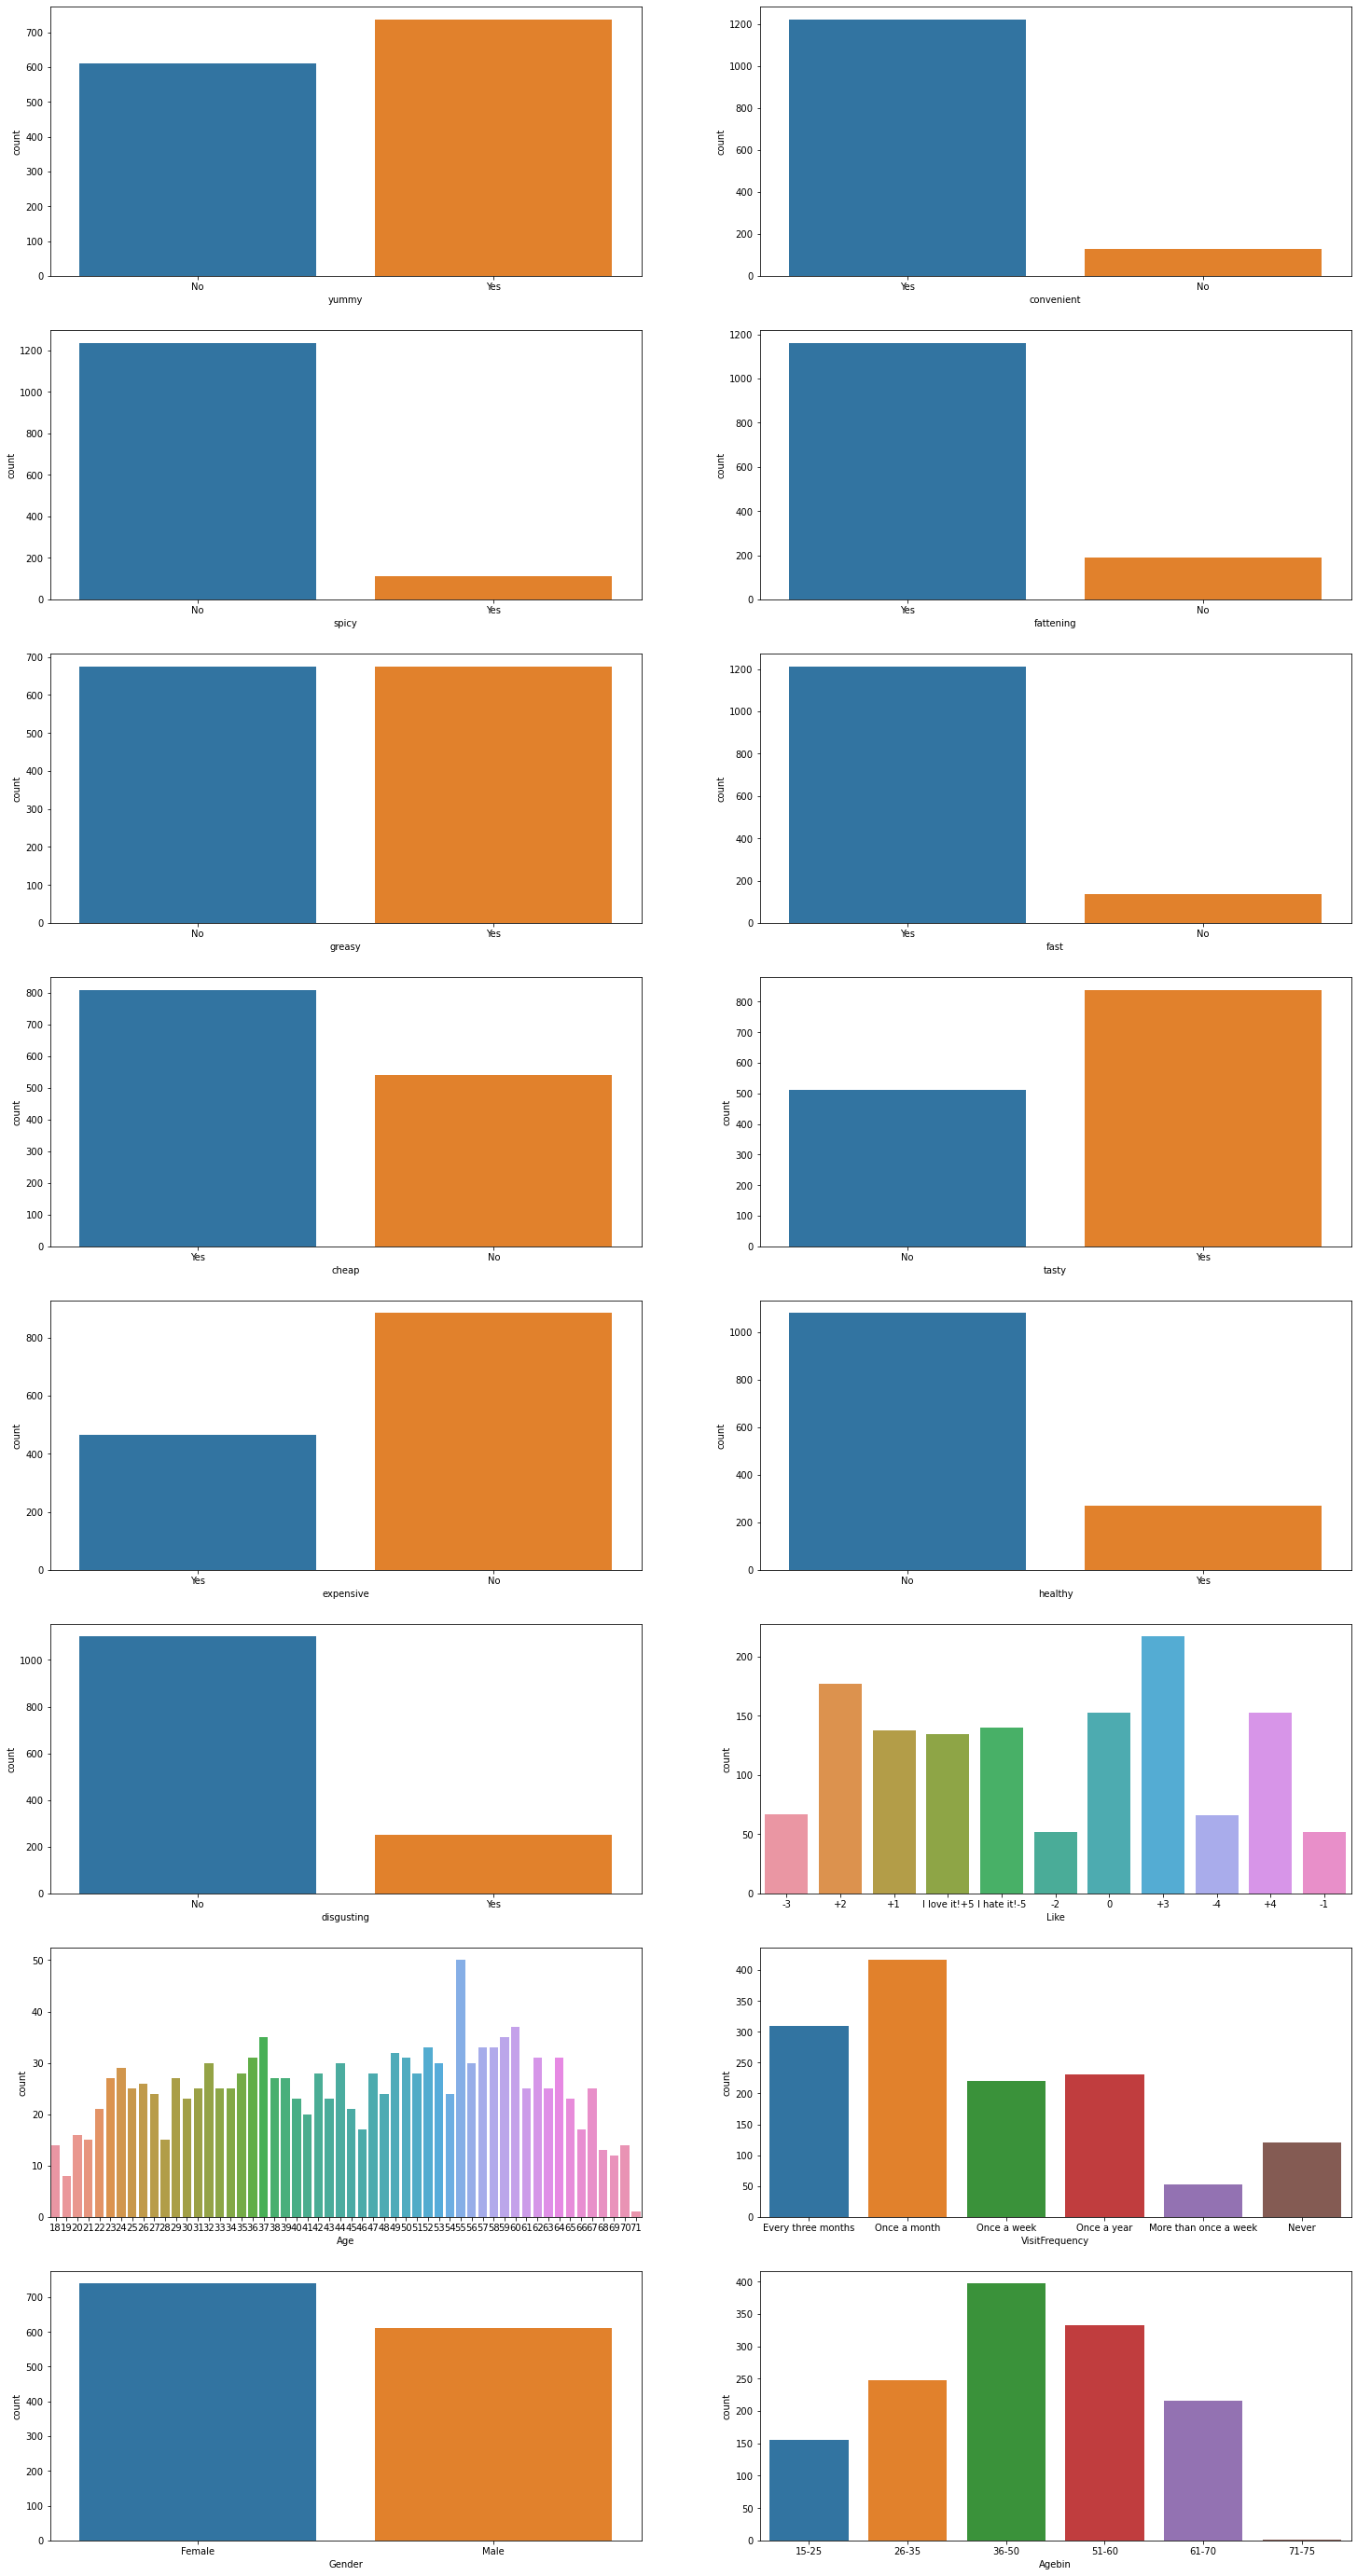

In [392]:
# Finding the distribution of values in each columns

fig, axs = plt.subplots(8, 2, figsize=(25, 50))
axs = axs.flatten()
for i, col in enumerate(datacopy.columns):
    sns.countplot(x=col,data=datacopy,ax=axs[i])
   

<AxesSubplot:xlabel='Agebin2', ylabel='count'>

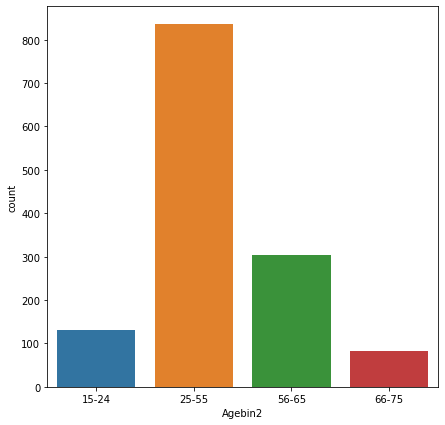

In [499]:
#Observe that the vast majority of the customers belong to the age group 25-55
plt.figure(figsize=(7, 7))
datacopy['Agebin2'] = pd.cut(datacopy['Age'], bins = [15,24,55, 65, 75], labels = ['15-24','25-55', '56-65', '66-75'])
sns.countplot(x=datacopy['Agebin2'])

In [275]:
#proportion of each values in the columns

for col in data.columns:
    print(data[col].value_counts()/len(data)*100 )

Yes    54.666667
No     45.333333
Name: yummy, dtype: float64
Yes    90.518519
No      9.481481
Name: convenient, dtype: float64
No     91.555556
Yes     8.444444
Name: spicy, dtype: float64
Yes    86.074074
No     13.925926
Name: fattening, dtype: float64
Yes    50.074074
No     49.925926
Name: greasy, dtype: float64
Yes    89.925926
No     10.074074
Name: fast, dtype: float64
Yes    59.925926
No     40.074074
Name: cheap, dtype: float64
Yes    62.148148
No     37.851852
Name: tasty, dtype: float64
No     65.481481
Yes    34.518519
Name: expensive, dtype: float64
No     80.0
Yes    20.0
Name: healthy, dtype: float64
No     81.481481
Yes    18.518519
Name: disgusting, dtype: float64
+3              16.074074
+2              13.111111
0               11.333333
+4              11.333333
I hate it!-5    10.370370
+1              10.222222
I love it!+5    10.000000
-3               4.962963
-4               4.888889
-2               3.851852
-1               3.851852
Name: Like, dtype: flo

In [276]:
# From the above derived proportions, the following conclusions can be made about the data:
# More than 50% of the customers visit atleast once a month and aaround 20% visit once a week.
# More than males, female customers visit the store.
# 80% of the customers beleive that the food is unhealthy.
# Only 34% of the customers feel that the food is expensive. 

In [394]:
# Converting non numeric values of the 'Like' column to numeric values

data=data.replace('-1',-1)
data=data.replace('-2',-2)
data=data.replace('-3',-3)
data=data.replace('-4',-4)
data=data.replace('+1',1)
data=data.replace('+2',2)
data=data.replace('+3',3)
data=data.replace('+4',4)
data=data.replace('0',0)
data=data.replace('I love it!+5',5)
data=data.replace('I hate it!-5',-5)

In [395]:
# Finding range of 'Age'column from the cleaned data

age_range=data['Age'].max()-data['Age'].min()
age_range

# Finding the minimum value in the 'Age'column
m=data['Age'].min()
m

18

In [500]:
# The following pairs of variables essentially express the same idea  :
# (expensive, cheap),(like, disgusting) and (like, tasty)
# So the columns 'expensive', 'disgusting' and 'like' can be dropped.

data.drop(['expensive', 'disgusting', 'Like'], inplace=True, axis=1)

In [501]:
# Converting categorical Columns to numeric
from sklearn import preprocessing
le=preprocessing.LabelEncoder()

# Obtaining the list of categorical value columns
objList = data.select_dtypes(include = "object").columns
print (objList)

#Converting all the categorical value columns to numeric columns 

for col in objList:
    data[col] = le.fit_transform(data[col])

print (data.info())

Index(['yummy', 'convenient', 'spicy', 'fattening', 'greasy', 'fast', 'cheap',
       'tasty', 'healthy', 'VisitFrequency', 'Gender'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1350 entries, 0 to 1452
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   yummy           1350 non-null   int32
 1   convenient      1350 non-null   int32
 2   spicy           1350 non-null   int32
 3   fattening       1350 non-null   int32
 4   greasy          1350 non-null   int32
 5   fast            1350 non-null   int32
 6   cheap           1350 non-null   int32
 7   tasty           1350 non-null   int32
 8   healthy         1350 non-null   int32
 9   Age             1350 non-null   int64
 10  VisitFrequency  1350 non-null   int32
 11  Gender          1350 non-null   int32
dtypes: int32(11), int64(1)
memory usage: 111.4 KB
None


In [502]:
data.head()

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,healthy,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,0,61,0,0
1,1,1,0,1,1,1,1,1,0,51,0,0
2,0,1,1,1,1,1,0,1,1,62,0,0
4,0,1,0,1,1,1,1,0,1,49,3,1
5,1,1,0,1,0,1,1,1,0,55,0,1


In [671]:
# To apply Scaling on the columns 'Age' and 'VisitFrequency'

from sklearn.preprocessing import MinMaxScaler
data_s=data.copy()
data_s.iloc[:,9:11]=MinMaxScaler().fit_transform(data_s.iloc[:,9:11])


In [610]:
data_s

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,healthy,Age,VisitFrequency,Gender
0,0,1,0,1,0,1,1,0,0,0.811321,0.0,0
1,1,1,0,1,1,1,1,1,0,0.622642,0.0,0
2,0,1,1,1,1,1,0,1,1,0.830189,0.0,0
4,0,1,0,1,1,1,1,0,1,0.584906,0.6,1
5,1,1,0,1,0,1,1,1,0,0.698113,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1448,0,1,0,1,1,0,0,0,0,0.547170,1.0,1
1449,1,1,0,1,0,0,1,1,1,0.339623,0.8,0
1450,1,1,0,1,0,1,0,1,0,0.641509,0.6,0
1451,1,1,0,0,0,1,1,1,1,0.433962,0.0,1


In [400]:
#Principal Component Analysis
from sklearn.decomposition import PCA

In [507]:
pca_comp=PCA(n_components=11).fit(data_s)

In [508]:
pca_comp.components_

array([[-5.98874087e-01, -1.56606908e-01, -8.75384990e-03,
         1.27994355e-01,  3.25215203e-01, -1.00341670e-01,
        -2.32080520e-01, -5.88392285e-01, -2.56866452e-01,
         5.83130205e-02,  1.34932754e-02,  1.22073095e-01],
       [ 2.58461400e-02, -4.65885427e-02,  3.09830190e-02,
        -2.34791358e-01, -4.10241591e-01, -1.21039698e-01,
        -4.76134728e-01,  2.80217893e-02,  9.82760911e-02,
         6.88944264e-02, -4.21045777e-02,  7.17257873e-01],
       [-3.67861755e-01, -2.17915145e-02,  2.92724626e-03,
        -2.59576176e-01, -6.42188526e-01,  4.73388823e-02,
         3.83392195e-01, -3.01386874e-01,  2.04724814e-01,
         2.35519040e-01,  5.65655475e-03, -2.16634114e-01],
       [ 5.55088364e-02, -7.18895121e-02, -3.08206660e-02,
        -4.56445710e-02, -2.09846921e-01, -1.58982479e-01,
        -7.07585656e-01,  1.46386096e-03,  2.36905727e-02,
         3.04980362e-02, -3.37033087e-02, -6.45057577e-01],
       [-2.45950570e-02, -1.14502798e-01,  1.3558101

In [509]:
pca_comp.explained_variance_ratio_

array([0.25677724, 0.13775668, 0.13409026, 0.11029037, 0.07749798,
       0.06270064, 0.04770758, 0.04357158, 0.0391985 , 0.03257548,
       0.03205534])

In [510]:
pca_df = pd.DataFrame(data=pca_comp.components_ , columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9","PCA10","PCA11","PCA12"])
pca_df

,PCA1,PCA2,PCA3,PCA4,PCA5,PCA6,PCA7,PCA8,PCA9,PCA10,PCA11,PCA12
0,-0.598874,-0.156607,-0.008754,0.127994,0.325215,-0.100342,-0.232081,-0.588392,-0.256866,0.058313,0.013493,0.122073
1,0.025846,-0.046589,0.030983,-0.234791,-0.410242,-0.121040,-0.476135,0.028022,0.098276,0.068894,-0.042105,0.717258
2,-0.367862,-0.021792,0.002927,-0.259576,-0.642189,0.047339,0.383392,-0.301387,0.204725,0.235519,0.005657,-0.216634
3,0.055509,-0.071890,-0.030821,-0.045645,-0.209847,-0.158982,-0.707586,0.001464,0.023691,0.030498,-0.033703,-0.645058
4,-0.024595,-0.114503,0.135581,-0.388387,0.445303,-0.141515,-0.023188,-0.092572,0.767426,-0.006962,-0.002399,-0.025130
5,-0.016649,0.080355,0.093640,0.013510,0.045116,0.059727,0.018821,-0.003600,-0.015800,0.098754,-0.983990,-0.010368
6,0.200584,-0.540624,-0.285553,-0.286936,0.000606,-0.585141,0.241880,-0.012626,-0.273532,-0.117311,-0.116650,-0.019375
7,-0.128548,-0.084616,0.670796,-0.359366,0.127450,-0.040295,0.019488,0.317278,-0.357996,0.369215,0.100226,-0.061369
8,-0.031607,-0.132550,0.339218,0.679721,-0.140700,-0.514096,0.091691,0.092755,0.266919,0.174714,0.007936,0.037505
9,0.227311,-0.748827,0.146374,0.171870,-0.052642,0.552182,-0.040671,-0.125788,0.073817,0.074992,-0.011750,0.016091


In [511]:
cumulative_variance = np.cumsum(pca_comp.explained_variance_ratio_)

In [512]:
cumulative_variance

array([0.25677724, 0.39453392, 0.52862418, 0.63891456, 0.71641254,
       0.77911318, 0.82682076, 0.87039234, 0.90959083, 0.94216631,
       0.97422165])

In [513]:
# Observing the cumulative variance, 90% of the variance is explained by the first 9 principal components.

final_pca_comp=PCA(n_components=9).fit_transform(data_s)

In [514]:
df_pca=pd.DataFrame(final_pca_comp, columns=["PCA1","PCA2","PCA3","PCA4","PCA5","PCA6","PCA7","PCA8","PCA9"])

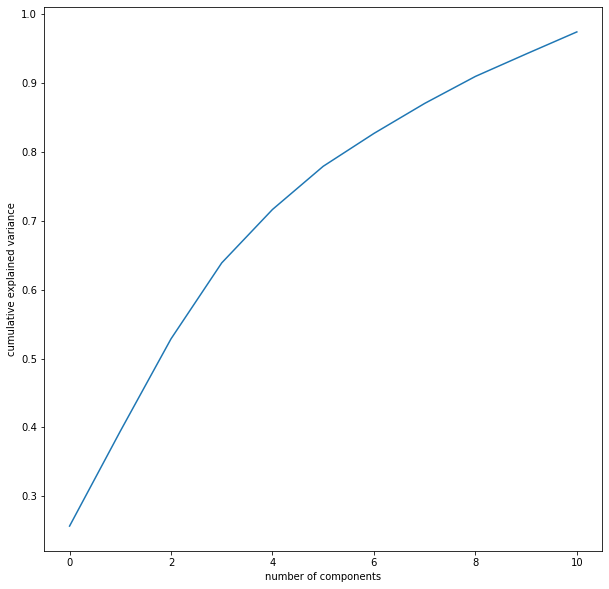

In [515]:

plt.plot(cumulative_variance)
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [307]:
# Since the data set is small, we proceed with the original data for clustering

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_i

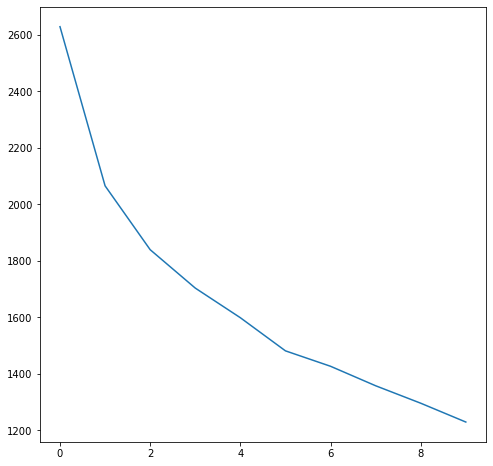

In [516]:
# Determining the number of clusters 

from sklearn.cluster import KMeans
count=list(range(1,11))
distance=list([0]*10)
for i in count:
    clustr_res=KMeans(n_clusters=i).fit(data_s)
    distance[i-1]=clustr_res.inertia_
plt.figure(figsize=(8,8))
plt.plot(distance)

In [399]:
# From the graph, we can infer that the elbow is at k=4, so we divide the data into 4 clusters 

In [659]:
# Extracting segments

final_cluster=KMeans(n_clusters=4).fit(data_s)

final_cluster.inertia_

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



1700.3752266583624

In [685]:

best_inertia = float('inf')
best_kmeans = None

for i in range(10):
    kmeans = KMeans(n_clusters=4, init='k-means++', n_init=1, random_state=i).fit(data_s)
    if kmeans.inertia_ < best_inertia:
        best_inertia = kmeans.inertia_
        final_cluster= kmeans
print(best_inertia )

1691.327938337968


In [686]:
data_s['cluster'] = final_cluster.labels_

In [687]:
#data_s.drop(['cluster'], axis=1, inplace=True)

In [688]:
# cluster size

from collections import Counter
Counter(final_cluster.labels_)

Counter({1: 322, 2: 298, 0: 294, 3: 436})

<AxesSubplot:xlabel='cluster', ylabel='count'>

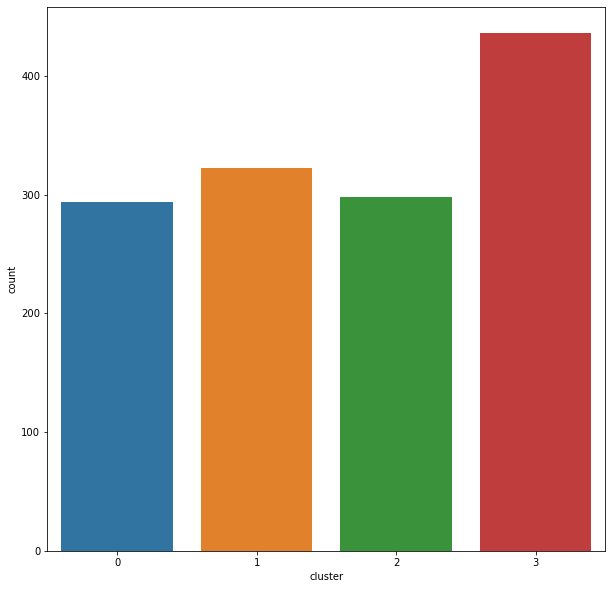

In [689]:
# Observe that:
# Cluster 0 has 294 members
# Cluster 1 has 322 members
# Cluster 2 has 298 members
# Cluster 3 has 436 members
sns.countplot(x=data_s['cluster'])

In [690]:
#Restoring the original values to columns
data_s['yummy']=data_s['yummy'].map({0:'No',1:'Yes'})
data_s['convenient']=data_s['convenient'].map({0:'No',1:'Yes'})
data_s['spicy']=data_s['spicy'].map({0:'No',1:'Yes'})
data_s['fattening']=data_s['fattening'].map({0:'No',1:'Yes'})
data_s['greasy']=data_s['greasy'].map({0:'No',1:'Yes'})
data_s['fast']=data_s['fast'].map({0:'No',1:'Yes'})
data_s['cheap']=data_s['cheap'].map({0:'No',1:'Yes'})
data_s['tasty']=data_s['tasty'].map({0:'No',1:'Yes'})
data_s['healthy']=data_s['healthy'].map({0:'No',1:'Yes'})
data_s['Age']=data_s['Age']*age_range+m
data_s['VisitFrequency']=data_s['VisitFrequency'].map({0.0:'Every three months', 0.8:'once a week', 0.6:'once a month', 1.0:'once a year', 0.4:'Never',0.2:'More than once a week'})
data_s['Gender']=data_s['Gender'].map({0:'Female',1:'Male'})

In [ ]:
data_s

In [692]:

data_s.fillna(value={'VisitFrequency':'once a month'}, inplace=True)


In [691]:
data_s

,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,healthy,Age,VisitFrequency,Gender,cluster
0,No,Yes,No,Yes,No,Yes,Yes,No,No,61.0,Every three months,Female,1
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,51.0,Every three months,Female,2
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,62.0,Every three months,Female,0
4,No,Yes,No,Yes,Yes,Yes,Yes,No,Yes,49.0,NaN,Male,1
5,Yes,Yes,No,Yes,No,Yes,Yes,Yes,No,55.0,Every three months,Male,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1448,No,Yes,No,Yes,Yes,No,No,No,No,47.0,once a year,Male,0
1449,Yes,Yes,No,Yes,No,No,Yes,Yes,Yes,36.0,once a week,Female,3
1450,Yes,Yes,No,Yes,No,Yes,No,Yes,No,52.0,NaN,Female,3
1451,Yes,Yes,No,No,No,Yes,Yes,Yes,Yes,41.0,Every three months,Male,3


In [694]:
cluster_age =pd.crosstab(data_s['cluster'],data_s['Age'])
cluster_age

Age,18.0,19.0,20.0,21.0,22.0,23.0,24.0,25.0,26.0,27.0,...,62.0,63.0,64.0,65.0,66.0,67.0,68.0,69.0,70.0,71.0
cluster,,,,,,,,,,,,,,,,,,,,,
0,2,2,1,1,1,0,3,0,2,6,...,13,6,5,4,3,7,2,3,5,0
1,1,2,3,3,4,2,4,1,5,2,...,8,10,12,10,8,3,5,2,5,0
2,10,4,12,8,9,19,16,12,15,8,...,3,2,0,2,1,2,1,1,0,0
3,1,0,0,3,7,6,6,12,4,8,...,7,7,14,7,5,13,5,6,4,1


In [695]:
datacopy2=data_s.copy()
datacopy2['Agebin'] = pd.cut(datacopy2['Age'], bins = [15,25, 35, 50, 60, 70, 75], labels = ['15-25','26-35', '36-50', '51-60', '61-70','71-75'])
cluster_agebin =pd.crosstab(datacopy2['cluster'],datacopy2['Agebin'])
cluster_agebin

Agebin,15-25,26-35,36-50,51-60,61-70,71-75
cluster,,,,,,
0,10,35,102,91,56,0
1,20,41,73,121,67,0
2,90,98,58,37,15,0
3,35,74,133,115,78,1


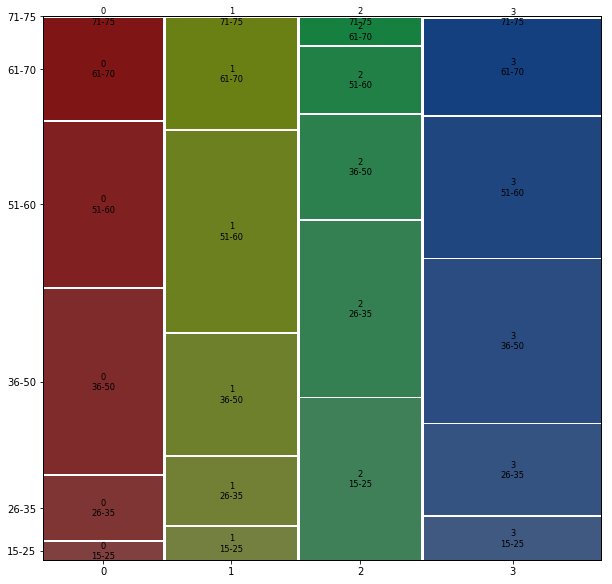

In [696]:

plt.rcParams['figure.figsize'] = (10,10)
mosaic(cluster_agebin.stack())
plt.show()
# Observe that more than 50% of the people in cluster 2 are less than 35 years of age
# About half of the people in cluster 0 and cluster 1 are above 50 years of age

In [697]:
cluster_vf =pd.crosstab(data_s['cluster'],data_s['VisitFrequency'])
cluster_vf

VisitFrequency,Every three months,More than once a week,Never,once a month,once a week,once a year
cluster,,,,,,
0,79,2,55,55,23,80
1,77,1,62,58,24,100
2,60,19,3,116,77,23
3,94,30,0,187,97,28


In [698]:
# Calculate the proportions
cluster_vf_prop = cluster_vf.apply(lambda x: 100*x/x.sum(), axis=1)

# Print the proportions
print(cluster_vf_prop)

VisitFrequency  Every three months  More than once a week      Never  \
cluster                                                                
0                        26.870748               0.680272  18.707483   
1                        23.913043               0.310559  19.254658   
2                        20.134228               6.375839   1.006711   
3                        21.559633               6.880734   0.000000   

VisitFrequency  once a month  once a week  once a year  
cluster                                                 
0                  18.707483     7.823129    27.210884  
1                  18.012422     7.453416    31.055901  
2                  38.926174    25.838926     7.718121  
3                  42.889908    22.247706     6.422018  


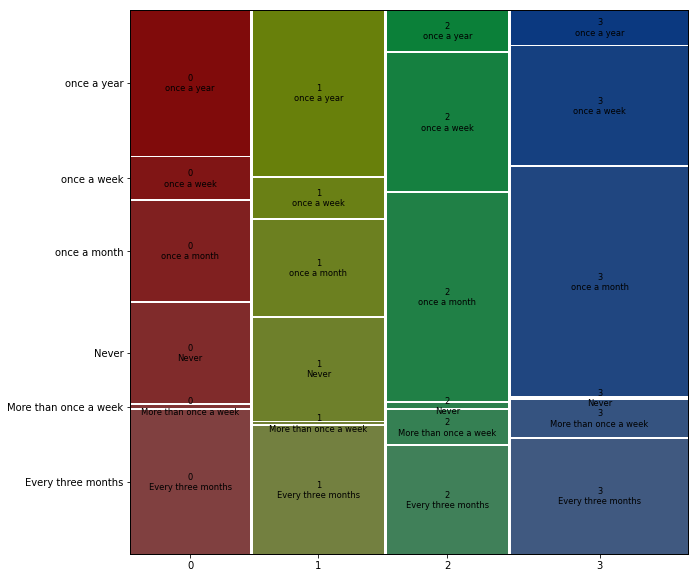

In [699]:
#MOSAIC PLOT
from statsmodels.graphics.mosaicplot import mosaic


plt.rcParams['figure.figsize'] = (10,10)
mosaic(cluster_vf.stack())
plt.show()

# Observe that in cluster 2 and 3, just 1% have 'Never' visited the store whereas about 30% visit atleast 
# once a week. Also, more than 70% in cluster 2 and 3 visit the atleast once a month.

# Cluster 0 and 1 are similar in terms of visit frequency. Around 20% never visit the store, about 60% 
# visit atmost once a month and a meagre 8% visit atleast once a week. 



In [700]:
cluster_gender =pd.crosstab(data_s['cluster'],data_s['Gender'])
cluster_gender


Gender,Female,Male
cluster,,
0,123,171
1,183,139
2,174,124
3,259,177


In [ ]:
# Observe that males and females are almost evenly distributed across all clusters.

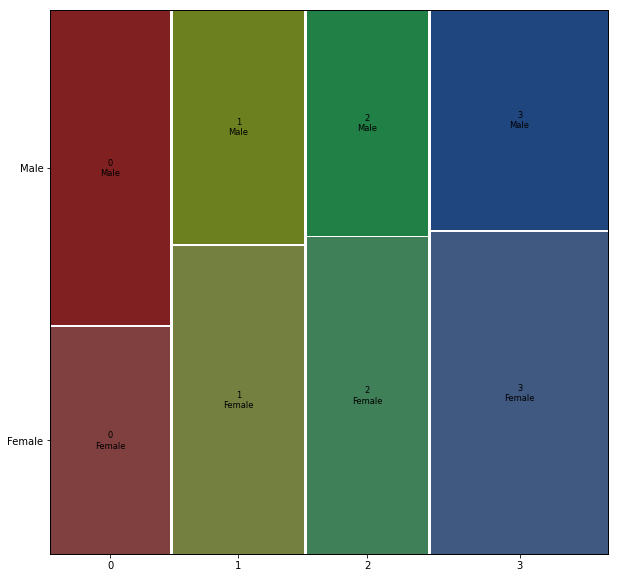

In [701]:
plt.rcParams['figure.figsize'] = (10,10)
mosaic(cluster_gender.stack())
plt.show()

In [702]:
cluster_tasty =pd.crosstab(data_s['cluster'],data_s['tasty'])
cluster_tasty

tasty,No,Yes
cluster,,
0,247,47
1,245,77
2,9,289
3,10,426


In [ ]:
# Observe that majority of cluster 0 and cluster 1 found the food not to be tasty. Whereas cluster 2 and 3 found it to be tasty.

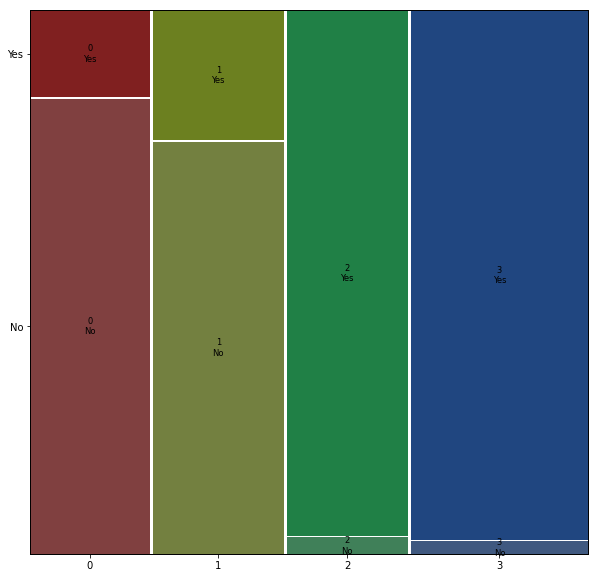

In [703]:
plt.rcParams['figure.figsize'] = (10,10)
mosaic(cluster_tasty.stack())
plt.show()

In [704]:
cluster_c =pd.crosstab(data_s['cluster'],data_s['convenient'])
cluster_c


convenient,No,Yes
cluster,,
0,72,222
1,38,284
2,7,291
3,11,425


In [357]:
# Almost all in cluster 1,2 and 3 gave a thumps up to convenience and about 75% of cluster 0 agreed. 

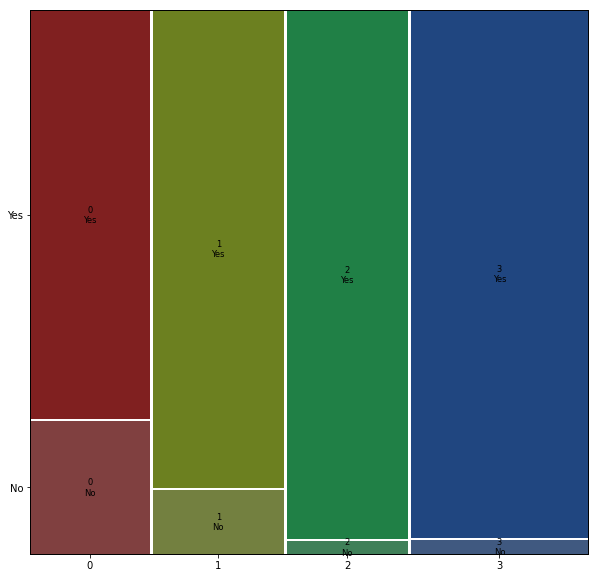

In [705]:
plt.rcParams['figure.figsize'] = (10,10)
mosaic(cluster_c.stack())
plt.show()

In [706]:
cluster_h =pd.crosstab(data_s['cluster'],data_s['healthy'])
cluster_h

healthy,No,Yes
cluster,,
0,280,14
1,294,28
2,247,51
3,259,177


In [ ]:
# Vast majority of cluster 0, 1 and 2 are of the opinion that the food is unhealthy. 
# About 40% in CLuster 3 thinks that the food is healthy

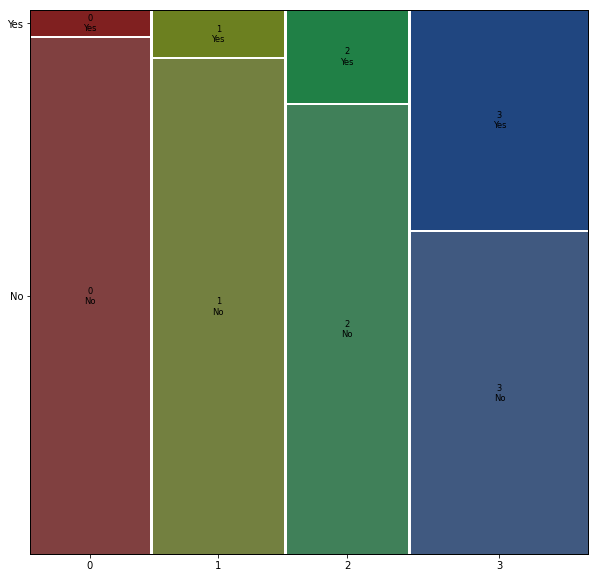

In [707]:
plt.rcParams['figure.figsize'] = (10,10)
mosaic(cluster_h.stack())
plt.show()

In [708]:
cluster_fast =pd.crosstab(data_s['cluster'],data_s['fast'])
cluster_fast

# Almost all across all the clusters said the service is fast.

fast,No,Yes
cluster,,
0,79,215
1,12,310
2,17,281
3,28,408


In [710]:
cluster_f=pd.crosstab(data_s['cluster'],data_s['fattening'])
cluster_f

fattening,No,Yes
cluster,,
0,33,261
1,18,304
2,9,289
3,128,308


In [ ]:
# Vast majority of across all clusters are of the opinion that the food is fattening. Though cluster 3 seems to be a bit less concerned.

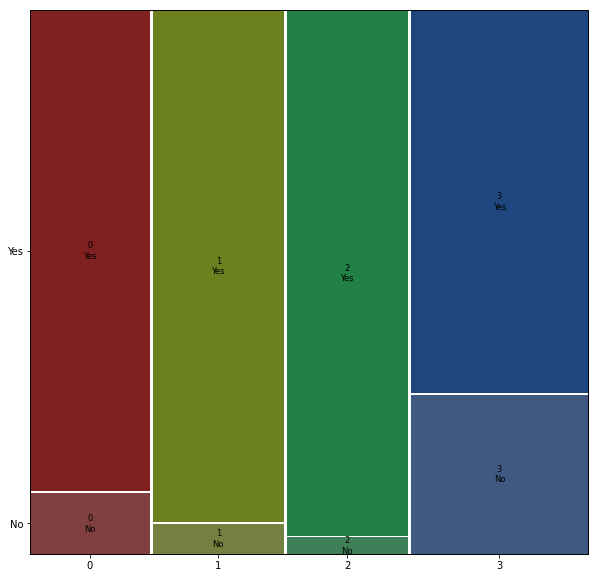

In [712]:
plt.rcParams['figure.figsize'] = (10,10)
mosaic(cluster_f.stack())
plt.show()

In [713]:
cluster_ch =pd.crosstab(data_s['cluster'],data_s['cheap'])
cluster_ch

cheap,No,Yes
cluster,,
0,294,0
1,0,322
2,114,184
3,133,303


In [372]:
# It is observed that price is a concern only within cluster 0. Most people in cluster 1,2 and 3 feels that its cheap

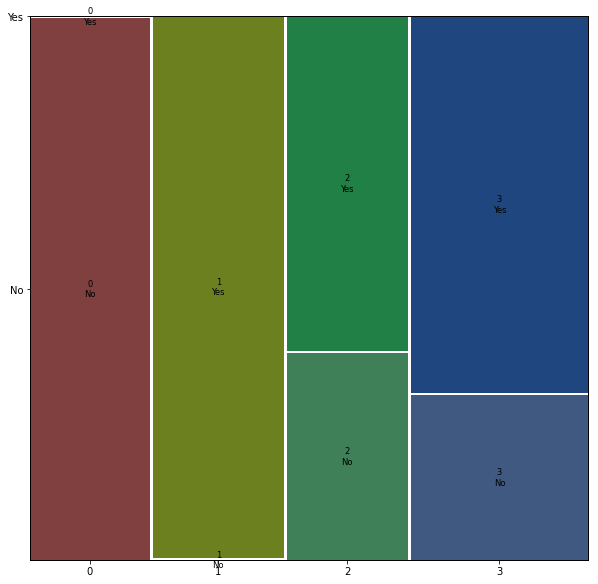

In [714]:
plt.rcParams['figure.figsize'] = (10,10)
mosaic(cluster_ch.stack())
plt.show()

In [ ]:
# From the above visualizations, we can make the following observations:

# Cluster 0 has 294 members
# Cluster 1 has 322 members
# Cluster 2 has 298 members
# Cluster 3 has 436 members

# Males and females are almost evenly distributed across all clusters.

# More than 50% of the people in cluster 2 are less than 35 years of age
# About half of the people in cluster 0 and cluster 1 are above 50 years of age

# Majority of cluster 0 and cluster 1 found the food not to be tasty.
# Whereas majority in cluster 2 and 3 found it to be tasty.

# Almost all in cluster 1,2 and 3 gave a thumps up to convenience and about 75% of cluster 0 agreed. 

# Vast majority of cluster 0, 1 and 2 are of the opinion that the food is unhealthy. 
# About 40% in Cluster 3 thinks that the food is healthy

# Almost all across all the clusters said that the service is fast.

# Vast majority across all clusters are of the opinion that the food is fattening.
# Though cluster 3 seems to be a bit less concerned.

# Cost is a concern only within cluster 0. Most people in cluster 1,2 and 3 feels that its cheap.


# Summary:

# Convenience and fastness are the most important features.
# Only cluster 3 has a considerable proportion thinking that the food is healthy, and it is the largest cluster. So, appealing
# to the health conscious mind improve the sales 
# Clusters except cluster 0 seems to be promising, they are mostly positive about the service and do not complain about cost. 




In [378]:

# Cluster 0, comprised mostly of females aged less than 50, are more frequent visitors. Despite the opinion that the food 
# is fattening and unhealthy, they tend to visit more. The factors like convenience, quickness and taste may be the reason.

# Cluster 1 is characterised by price concern and dislike towards the food due various concerns like
# taste, fat and health. Also, they visit the store rarely.

# Cluster 2 also comprises frequent visitors. They beleive that the food is tasty, healthy and not fattening. 
# This cluster donot need much attention since it would not be much difficult to satisfy them. 

# Cluster 3, despite cost and health concerns, the frequency of visits is not low. Must be prioritising taste and convenience

# Summarizing: 
# Taste, convenience and fastness are the most important factors for increased sales. Cost have an impact, but not much.
# Health concerns are not found to be decreasing the popularity.